## Big Mart Sales prediction

The objective of the project is to build a predictive model and predict the sales of each product at a particular outlet.

### Data Dictionary

     Variable	                Description
     Item_Identifier	        Unique product ID
     Item_Weight	            Weight of product
     Item_Fat_Content	        Whether the product is low fat or not
     Item_Visibility	        The % of total display area of all products in a store allocated to the particular product
     Item_Type      	        The category to which the product belongs
     Item_MRP	                Maximum Retail Price (list price) of the product
     Outlet_Identifier	        Unique store ID
     Outlet_Establishment_Year	The year in which store was established
     Outlet_Size            	The size of the store in terms of ground area covered
     Outlet_Location_Type    	The type of city in which the store is located
     Outlet_Type	            Whether the outlet is just a grocery store or some sort of supermarket
     Item_Outlet_Sales      	Sales of the product in the particular store. This is the outcome variable to be predicted.

In [1917]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1918]:
# Get the datasets
df_train = pd.read_csv(r'C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Bigmart Sales\Train.csv')
df_test = pd.read_csv(r'C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Bigmart Sales\Test.csv')

In [1919]:
# Create a new column called Type for filtering in future
df_train['Type'] = 'Train'
df_test['Type'] = 'Test'

In [1920]:
#Concate train & Test datasets into a single dataset
df = pd.concat([df_train,df_test],ignore_index = True)

#### Basic Checks on the dataset

In [1921]:
# check the shape of the data
print(df.shape);print(df_train.shape);print(df_test.shape)

(14204, 13)
(8523, 13)
(5681, 12)


In [1922]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [1923]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Type                         14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [1924]:
#check for missing values (%)
round(df.isnull().sum()*100/df.shape[0],0)

Item_Fat_Content              0.0
Item_Identifier               0.0
Item_MRP                      0.0
Item_Outlet_Sales            40.0
Item_Type                     0.0
Item_Visibility               0.0
Item_Weight                  17.0
Outlet_Establishment_Year     0.0
Outlet_Identifier             0.0
Outlet_Location_Type          0.0
Outlet_Size                  28.0
Outlet_Type                   0.0
Type                          0.0
dtype: float64

We can see that 'Item_Weight','Outlet_Size' has 17% & 28% missing values respectively. The missing value in Item_Outlet_Sales column is from test set where we actually need to predict the value. Hence, it is not a missing value

In [1925]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


Outlet_Establishment_Year cannot be treated as numeric column like others as it is a year column. It is better to calculate the age of the outlet.

In [1926]:
# Let us check the how many unique elements are present in each column
df.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
Type                             2
dtype: int64

In [1927]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [1928]:
# There are value mismatch in Item_Fat_Content column hence, needs to be rectified
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:'Low Fat' if x=='LF' else x )
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:'Low Fat' if x=='low fat' else x )
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:'Regular' if x=='reg' else x )

In [1929]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [1930]:
# However, all the items are not eatable. Hence, not eatable products cannot have fat items.
df['item_group'] = df['Item_Identifier'].str[0:2]
df['item_group'] =df['item_group'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [1931]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,Non-Consumable


In [1932]:
df.loc[df.item_group == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Consumable'
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,Food
4,Non-Consumable,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,Non-Consumable


In [1933]:
#Get the age of the stores
df['age']=2020 - df['Outlet_Establishment_Year']

In [1934]:
# Now let us drop the Outlet_Establishment_Year
df.drop('Outlet_Establishment_Year',axis=1,inplace = True)

In [1935]:
# Create a age-bin of the store
df['age_bin'] = pd.cut(df['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                           labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])#

In [1936]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [1937]:
df.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [1938]:
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [1939]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [1940]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

### Missing value imputation

Let us start missing value impuation with Item Weight. From the above distribution, we can see that, item weight is equally Distributed. However, to make the imputation more robust, let us first, calculate the mean weight of each product then replace the NAN with it.

First let us check the distribution of the weight by each store

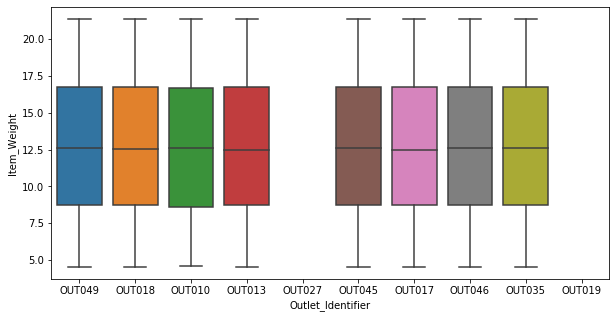

In [1941]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Weight', data = df)

In [1942]:
# average weight of each item:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier',aggfunc = 'mean').reset_index()

In [1943]:
item_avg_weight.rename(columns={'Item_Weight':'mean_Item_Weight'},inplace = True)
item_avg_weight.head()

,Item_Identifier,mean_Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115


In [1944]:
# Create a new column on the dataset with mean weight of each product
df = pd.merge(df,item_avg_weight,how='left',on='Item_Identifier')

In [1945]:
# Using Mask method in python,replace the NaN of Item_Weight Column with mean_Item_Weight
df['Item_Weight']=df['Item_Weight'].mask(pd.isnull, df['mean_Item_Weight'])

Let us check the distribution of the weight by each store again

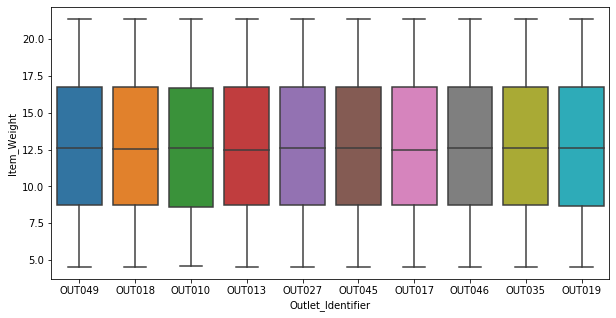

In [1946]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Weight', data = df)

It seems, Item_Weight column imputed properly now. The next column is Outlet_Size which is a categorical column. Let us drop the 'mean_Item_Weight' from the dataset

In [1947]:
df.drop('mean_Item_Weight',axis=1,inplace=True)

In [1948]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group,age,age_bin
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,21,20-30
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,Train,Drinks,11,0-20
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,21,20-30
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,OUT010,Tier 3,NaN,Grocery Store,Train,Food,22,20-30
4,Non-Consumable,NCD19,53.8614,994.7052,Household,0.000000,8.93,OUT013,Tier 3,High,Supermarket Type1,Train,Non-Consumable,33,30-40


Let us look into 'Outlet_Size' now

In [1949]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [1950]:
k = df[~df['Outlet_Size'].notnull()]

In [1951]:
k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4016 entries, 3 to 14203
Data columns (total 15 columns):
Item_Fat_Content        4016 non-null object
Item_Identifier         4016 non-null object
Item_MRP                4016 non-null float64
Item_Outlet_Sales       2410 non-null float64
Item_Type               4016 non-null object
Item_Visibility         4016 non-null float64
Item_Weight             4016 non-null float64
Outlet_Identifier       4016 non-null object
Outlet_Location_Type    4016 non-null object
Outlet_Size             0 non-null object
Outlet_Type             4016 non-null object
Type                    4016 non-null object
item_group              4016 non-null object
age                     4016 non-null int64
age_bin                 4016 non-null category
dtypes: category(1), float64(4), int64(1), object(9)
memory usage: 474.9+ KB


In [1952]:
k.apply(lambda x: len(x.unique()))

Item_Fat_Content           3
Item_Identifier         1559
Item_MRP                3390
Item_Outlet_Sales       1628
Item_Type                 16
Item_Visibility         3698
Item_Weight              415
Outlet_Identifier          3
Outlet_Location_Type       2
Outlet_Size                1
Outlet_Type                2
Type                       2
item_group                 3
age                        3
age_bin                    2
dtype: int64

In [1953]:
# There are 3 Outlet_Identifier for whom size is missing. They are:
k.Outlet_Identifier.unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

Let us look at the pattern of data for these outlets in the main dataframe

In [1954]:
df.loc[(df['Outlet_Size'].isnull())&(df['Outlet_Identifier']=='OUT045')].describe(include=['O'])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group
count,1548,1548,1548,1548,1548,0.0,1548,1548,1548
unique,3,1548,16,1,1,0.0,1,2,3
top,Low Fat,DRC25,Fruits and Vegetables,OUT045,Tier 2,NaN,Supermarket Type1,Train,Food
freq,707,1,218,1548,1548,NaN,1548,929,1111


In [1955]:
df.loc[(df['Outlet_Size'].isnull())&(df['Outlet_Identifier']=='OUT017')].describe(include=['O'])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group
count,1543,1543,1543,1543,1543,0.0,1543,1543,1543
unique,3,1543,16,1,1,0.0,1,2,3
top,Low Fat,FDZ40,Snack Foods,OUT017,Tier 2,NaN,Supermarket Type1,Train,Food
freq,708,1,219,1543,1543,NaN,1543,926,1107


In [1956]:
df.loc[(df['Outlet_Size'].isnull())&(df['Outlet_Identifier']=='OUT010')].describe(include=['O'])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group
count,925,925,925,925,925,0.0,925,925,925
unique,3,925,16,1,1,0.0,1,2,3
top,Low Fat,FDZ40,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,Train,Food
freq,418,1,137,925,925,NaN,925,555,660


Both OUT017	& OUT045 are in Tier 2 location and their type is Supermarket Type1. Let us check what is the size of this type
of outlet in the dataset

In [1957]:
df.loc[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2')]['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

We can see that the type of Outlet is Small in this category. So we can imput with 'Small' size

In [1958]:
df.loc[(df["Outlet_Size"].isnull())&(df["Outlet_Identifier"].isin(["OUT045","OUT017"])),"Outlet_Size"] = "Small"

In [1959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content        14204 non-null object
Item_Identifier         14204 non-null object
Item_MRP                14204 non-null float64
Item_Outlet_Sales       8523 non-null float64
Item_Type               14204 non-null object
Item_Visibility         14204 non-null float64
Item_Weight             14204 non-null float64
Outlet_Identifier       14204 non-null object
Outlet_Location_Type    14204 non-null object
Outlet_Size             13279 non-null object
Outlet_Type             14204 non-null object
Type                    14204 non-null object
item_group              14204 non-null object
age                     14204 non-null int64
age_bin                 14204 non-null category
dtypes: category(1), float64(4), int64(1), object(9)
memory usage: 2.3+ MB


In [1960]:
df[df['Outlet_Identifier']=='OUT010'].Outlet_Location_Type.unique()

array(['Tier 3'], dtype=object)

In [1961]:
df[df['Outlet_Identifier']=='OUT010'].Outlet_Type.unique()

array(['Grocery Store'], dtype=object)

So for 'OUT010',Outlet_Location_Type = 'Tier 3' & Outlet_Type = 'Grocery Store'

In [1962]:
df[(df['Outlet_Location_Type']=='Tier 3')&(df['Outlet_Type']=='Grocery Store')].Outlet_Size.value_counts()

Series([], Name: Outlet_Size, dtype: int64)

Hence, the Size is completely blank in this section. Let us use Random Forest Algorithm to predict the same

In [1963]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group,age,age_bin
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,21,20-30
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,Train,Drinks,11,0-20
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,21,20-30
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,OUT010,Tier 3,NaN,Grocery Store,Train,Food,22,20-30
4,Non-Consumable,NCD19,53.8614,994.7052,Household,0.000000,8.93,OUT013,Tier 3,High,Supermarket Type1,Train,Non-Consumable,33,30-40


In [1964]:
df1 = df.copy()

impute ordinal data

In [1965]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1,'Non-Consumable':2})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
df['age_bin'] = df['age_bin'].map({'0-20':0,'20-30':1,'30-40':2})
df['Outlet_Type'] = df['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
df['Outlet_Size'] = df['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

impute nominal data

In [1966]:
df = pd.get_dummies(df,columns=["Item_Type","item_group"],drop_first=True)

In [1967]:
df.drop('Type',axis=1,inplace = True)
df.drop('Item_Outlet_Sales',axis=1,inplace = True)

In [1968]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,age,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,item_group_Food,item_group_Non-Consumable
0,0,FDA15,249.8092,0.016047,9.30,OUT049,0,1.0,1,21,...,0,0,0,0,0,0,0,0,1,0
1,1,DRC01,48.2692,0.019278,5.92,OUT018,2,1.0,2,11,...,0,0,0,0,0,0,1,0,0,0
2,0,FDN15,141.6180,0.016760,17.50,OUT049,0,1.0,1,21,...,0,0,1,0,0,0,0,0,1,0
3,1,FDX07,182.0950,0.000000,19.20,OUT010,2,NaN,0,22,...,0,0,0,0,0,0,0,0,1,0
4,2,NCD19,53.8614,0.000000,8.93,OUT013,2,2.0,1,33,...,0,1,0,0,0,0,0,0,0,1


In [1969]:
i_columns = ['Item_MRP','Item_Visibility','Item_Weight','age']

In [1970]:
from sklearn.preprocessing import StandardScaler

In [1971]:
scaler = StandardScaler()
df[i_columns] = scaler.fit_transform(df[i_columns])
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,age,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,item_group_Food,item_group_Non-Consumable
0,0,FDA15,1.752511,-0.969852,-0.751014,OUT049,0,1.0,1,-0.139681,...,0,0,0,0,0,0,0,0,1,0
1,1,DRC01,-1.493696,-0.907063,-1.477653,OUT018,2,1.0,2,-1.334228,...,0,0,0,0,0,0,1,0,0,0
2,0,FDN15,0.009874,-0.956000,1.011839,OUT049,0,1.0,1,-0.139681,...,0,0,1,0,0,0,0,0,1,0
3,1,FDX07,0.661838,-1.281712,1.377308,OUT010,2,NaN,0,-0.020226,...,0,0,0,0,0,0,0,0,1,0
4,2,NCD19,-1.403623,-1.281712,-0.830557,OUT013,2,2.0,1,1.293777,...,0,1,0,0,0,0,0,0,0,1


In [1972]:
# Split the data into train-test split
df_train =df[df['Outlet_Size'].notnull()]
df_test = df[~df['Outlet_Size'].notnull()] 

In [1973]:
df_train.shape

(13279, 28)

In [1974]:
df_test.shape

(925, 28)

In [1975]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [1976]:
# First let us remove the ids
k = df_train[['Item_Identifier','Outlet_Identifier']]
df_train.drop(k,axis=1,inplace = True)
# Putting feature variable to X
X = df_train.drop('Outlet_Size',axis=1)
# Putting response variable to y
y = df_train['Outlet_Size']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [1977]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (9295, 25)
X_test: (3984, 25)
y_train: (9295,)
y_test: (3984,)


Random Forest with default hyperparameter

In [1978]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [1979]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [1980]:
# Making predictions
predictions = rfc.predict(X_test)

In [1981]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import  accuracy_score

In [1982]:
print(accuracy_score(y_test,predictions))

1.0


In [1983]:
df_test.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,age,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,item_group_Food,item_group_Non-Consumable
3,1,FDX07,0.661838,-1.281712,1.377308,OUT010,2,NaN,0,-0.020226,...,0,0,0,0,0,0,0,0,1,0
28,1,FDE51,-1.538162,1.856194,-1.476578,OUT010,2,NaN,0,-0.020226,...,0,0,0,0,0,0,0,0,1,0
30,0,FDV38,-1.372469,2.028805,1.388057,OUT010,2,NaN,0,-0.020226,...,0,0,0,0,0,0,0,0,1,0
45,0,FDM39,0.597493,0.457591,-1.370162,OUT010,2,NaN,0,-0.020226,...,0,0,0,0,0,0,0,0,1,0
65,0,FDC46,0.715500,2.509202,1.054835,OUT010,2,NaN,0,-0.020226,...,0,0,0,0,0,1,0,0,1,0


In [1984]:
k = df_test[['Item_Identifier','Outlet_Identifier']]
df_test.drop(k,axis=1,inplace = True)

In [1985]:
#Since 'Outlet_Size' is the column that we need to predict, let us remove the column
df_test.drop('Outlet_Size',axis=1,inplace = True)

In [1986]:
predictions = rfc.predict(df_test)

In [1987]:
final_prediction = pd.DataFrame({'Outlet_Size':predictions})

In [1988]:
final_prediction = pd.concat([k,final_prediction],axis=1)

In [1989]:
final_prediction.Outlet_Size.value_counts()

1.0    925
Name: Outlet_Size, dtype: int64

#### Hence, we can conclude that, for OUT010 Outlet Size is 'Medium'

In [1990]:
#Let us impute the rest of the blank section of the column with 'Medium'
df1['Outlet_Size'] = df1[['Outlet_Size']].fillna(value='Medium')
df1.Outlet_Size.value_counts()

Small     7071
Medium    5580
High      1553
Name: Outlet_Size, dtype: int64

In [1991]:
# Again we cross check Outlet_Size for Tier 3 and 'Grocery Store' combination
df1[(df1['Outlet_Location_Type']=='Tier 3')&(df1['Outlet_Type']=='Grocery Store')].Outlet_Size.value_counts()

Medium    925
Name: Outlet_Size, dtype: int64

In [1992]:
#copy the data again
df = df1.copy()

In [1993]:
len(df1[df1['Item_Visibility']==0])*100/df.shape[0]

6.188397634469164

Only 6 % of the total dataset has 0 as Item_Visibility. Let us impute it with mean. However, we will be imputing the mean by
the product's own mean instead of mean from total dataset


In [1994]:
df1_Item_Identifier = df1.groupby('Item_Identifier')
prod_mean = pd.DataFrame(df1_Item_Identifier['Item_Visibility'].mean()).reset_index()
prod_mean.rename(columns={'Item_Visibility':'Item_Visibility_Mean'},inplace = True)
prod_mean.head()

,Item_Identifier,Item_Visibility_Mean
0,DRA12,0.034938
1,DRA24,0.045646
2,DRA59,0.133384
3,DRB01,0.079736
4,DRB13,0.006799


In [1995]:
df1 = pd.merge(df1,prod_mean,how ='left',on='Item_Identifier')

In [1996]:
df1.shape

(14204, 16)

In [1997]:
df1.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,item_group,age,age_bin,Item_Visibility_Mean
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,21,20-30,0.017235
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,Train,Drinks,11,0-20,0.020653
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,21,20-30,0.017457
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,OUT010,Tier 3,Medium,Grocery Store,Train,Food,22,20-30,0.017834
4,Non-Consumable,NCD19,53.8614,994.7052,Household,0.000000,8.93,OUT013,Tier 3,High,Supermarket Type1,Train,Non-Consumable,33,30-40,0.009780


In [1998]:
# Using Mask method in python,replace the 0 of Item_Visibility Column with Item_Visibility_Mean
df1['Item_Visibility']=df1['Item_Visibility'].mask(df1['Item_Visibility']==0, df1['Item_Visibility_Mean'])

In [1999]:
# Now, drop the mean column
df1.drop('Item_Visibility_Mean',axis=1,inplace = True)

In [2000]:
df1.shape

(14204, 15)

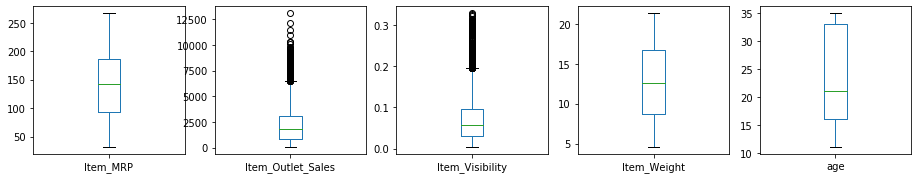

In [2001]:
df1.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(10,10), figsize=(32,32), sharex=False, sharey=False)
plt.show()

In [2002]:
Q1 = df1.Item_Visibility.quantile(0.5)
Q3 = df1.Item_Visibility.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

0.10706910604999989


In [2003]:
df1 = df1[~((df1['Item_Visibility'] < (Q1 - 1.5 * IQR)) |(df1['Item_Visibility'] > (Q3 + 1.5 * IQR)))]

In [2005]:
df1.shape

(14202, 15)

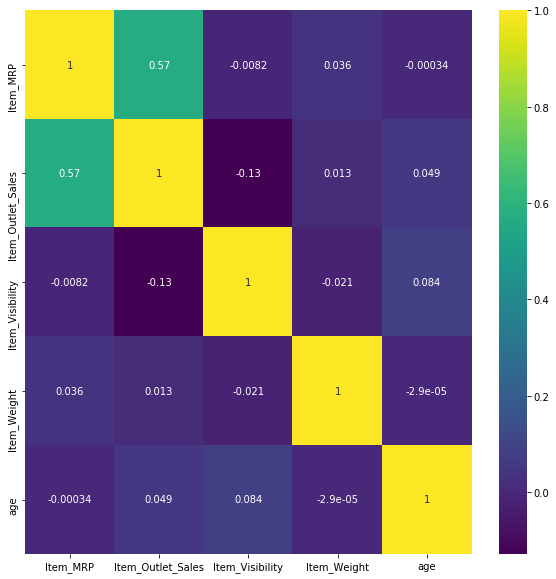

In [2006]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(df1.corr(),annot = True,cmap='viridis')
plt.show()

In [2007]:
#Get all the categorical column
o_columns = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type','item_group','age_bin']

In [2008]:
#Get all numerical column
i_columns = ['Item_MRP','Item_Outlet_Sales','Item_Visibility','Item_Weight','age']

In [2009]:
# Now let us divide the data into train and test for further processing

In [2010]:
df1_train = df1[df1['Type']=='Train']
df1_test = df1[df1['Type']=='Test']

In [2011]:
# Remove the Ids
df1_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace = True)

In [2012]:
# Let us drop the Type column from the datasets 
df1_train.drop('Type',axis=1,inplace = True)
df1_test.drop('Type',axis=1,inplace = True)

In [2013]:
df1_train.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,item_group,age,age_bin
0,Low Fat,249.8092,3735.1380,Dairy,0.016047,9.30,Tier 1,Medium,Supermarket Type1,Food,21,20-30
1,Regular,48.2692,443.4228,Soft Drinks,0.019278,5.92,Tier 3,Medium,Supermarket Type2,Drinks,11,0-20
2,Low Fat,141.6180,2097.2700,Meat,0.016760,17.50,Tier 1,Medium,Supermarket Type1,Food,21,20-30
3,Regular,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,Tier 3,Medium,Grocery Store,Food,22,20-30
4,Non-Consumable,53.8614,994.7052,Household,0.009780,8.93,Tier 3,High,Supermarket Type1,Non-Consumable,33,30-40


Impute nominal data

In [2014]:
df1_train = pd.get_dummies(df1_train,columns=["Item_Type","item_group"],drop_first=True)

impute ordinal data

In [2015]:
df1_train['Item_Fat_Content'] = df1_train['Item_Fat_Content'].map({'Low Fat':0,'Regular':1,'Non-Consumable':2})
df1_train['Outlet_Location_Type'] = df1_train['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
df1_train['age_bin'] = df1_train['age_bin'].map({'0-20':0,'20-30':1,'30-40':2})
df1_train['Outlet_Type'] = df1_train['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
df1_train['Outlet_Size'] = df1_train['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [2016]:
df1_train.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,age,age_bin,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,item_group_Food,item_group_Non-Consumable
0,0,249.8092,3735.1380,0.016047,9.30,0,1,1,21,1,...,0,0,0,0,0,0,0,0,1,0
1,1,48.2692,443.4228,0.019278,5.92,2,1,2,11,0,...,0,0,0,0,0,0,1,0,0,0
2,0,141.6180,2097.2700,0.016760,17.50,0,1,1,21,1,...,0,0,1,0,0,0,0,0,1,0
3,1,182.0950,732.3800,0.017834,19.20,2,1,0,22,1,...,0,0,0,0,0,0,0,0,1,0
4,2,53.8614,994.7052,0.009780,8.93,2,2,1,33,2,...,0,1,0,0,0,0,0,0,0,1


In [2017]:
i_columns = ['Item_MRP','Item_Visibility','Item_Weight','age']
scaler = StandardScaler()
df1_train[i_columns] = scaler.fit_transform(df1_train[i_columns])
df1_train.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,age,age_bin,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,item_group_Food,item_group_Non-Consumable
0,0,1.747800,3735.1380,-1.083089,-0.769493,0,1,1,-0.139203,1,...,0,0,0,0,0,0,0,0,1,0
1,1,-1.488910,443.4228,-1.018084,-1.497065,2,1,2,-1.333954,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0.010261,2097.2700,-1.068748,0.995624,0,1,1,-0.139203,1,...,0,0,1,0,0,0,0,0,1,0
3,1,0.660317,732.3800,-1.047134,1.361562,2,1,0,-0.019728,1,...,0,0,0,0,0,0,0,0,1,0
4,2,-1.399100,994.7052,-1.209187,-0.849139,2,2,1,1.294499,2,...,0,1,0,0,0,0,0,0,0,1


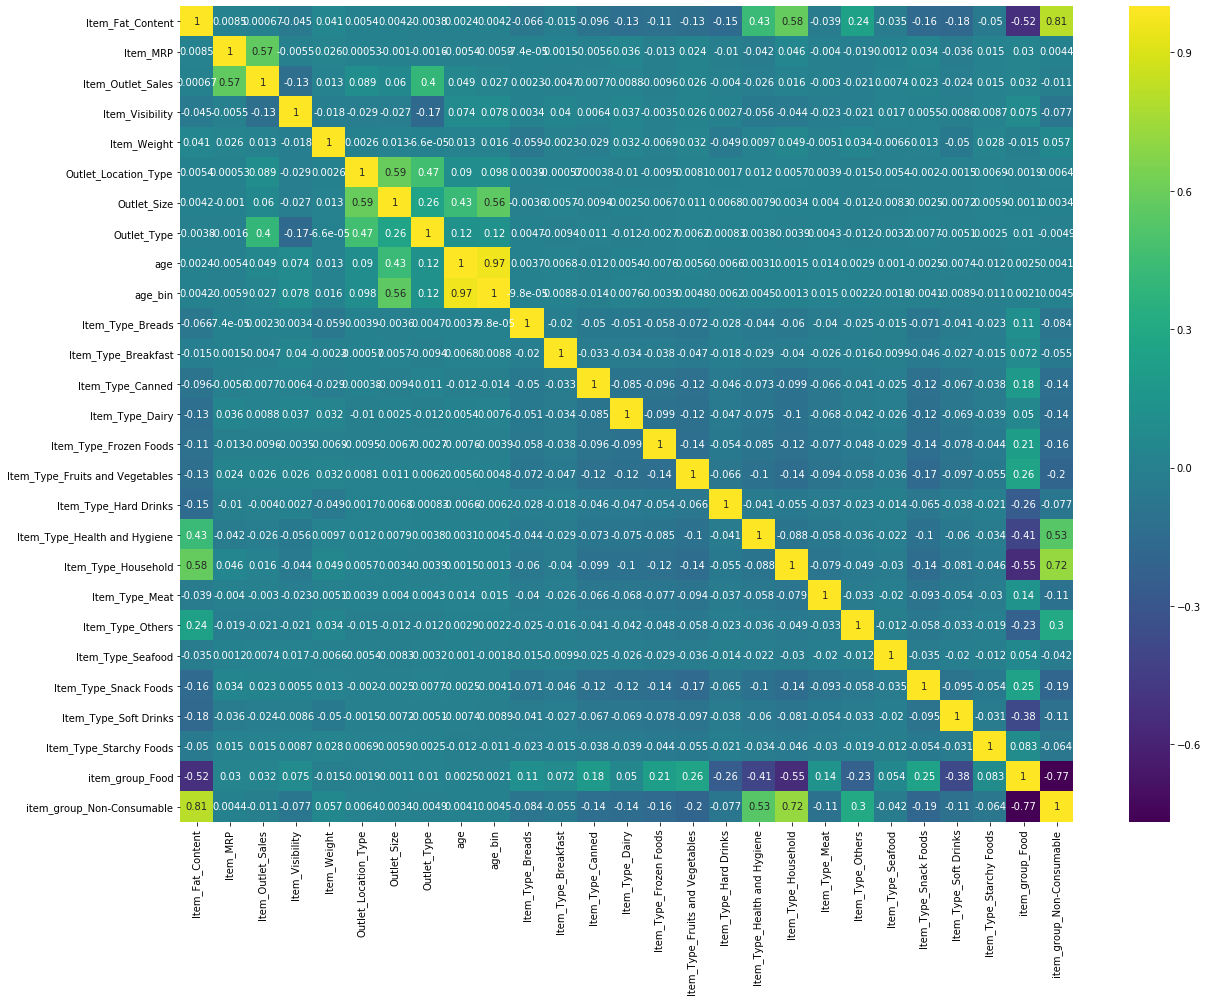

In [2018]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(df1_train.corr(),annot = True,cmap='viridis')
plt.show()

In [2019]:
df1_train.drop(['Item_Fat_Content','Item_Type_Household','item_group_Food'],axis=1,inplace = True)

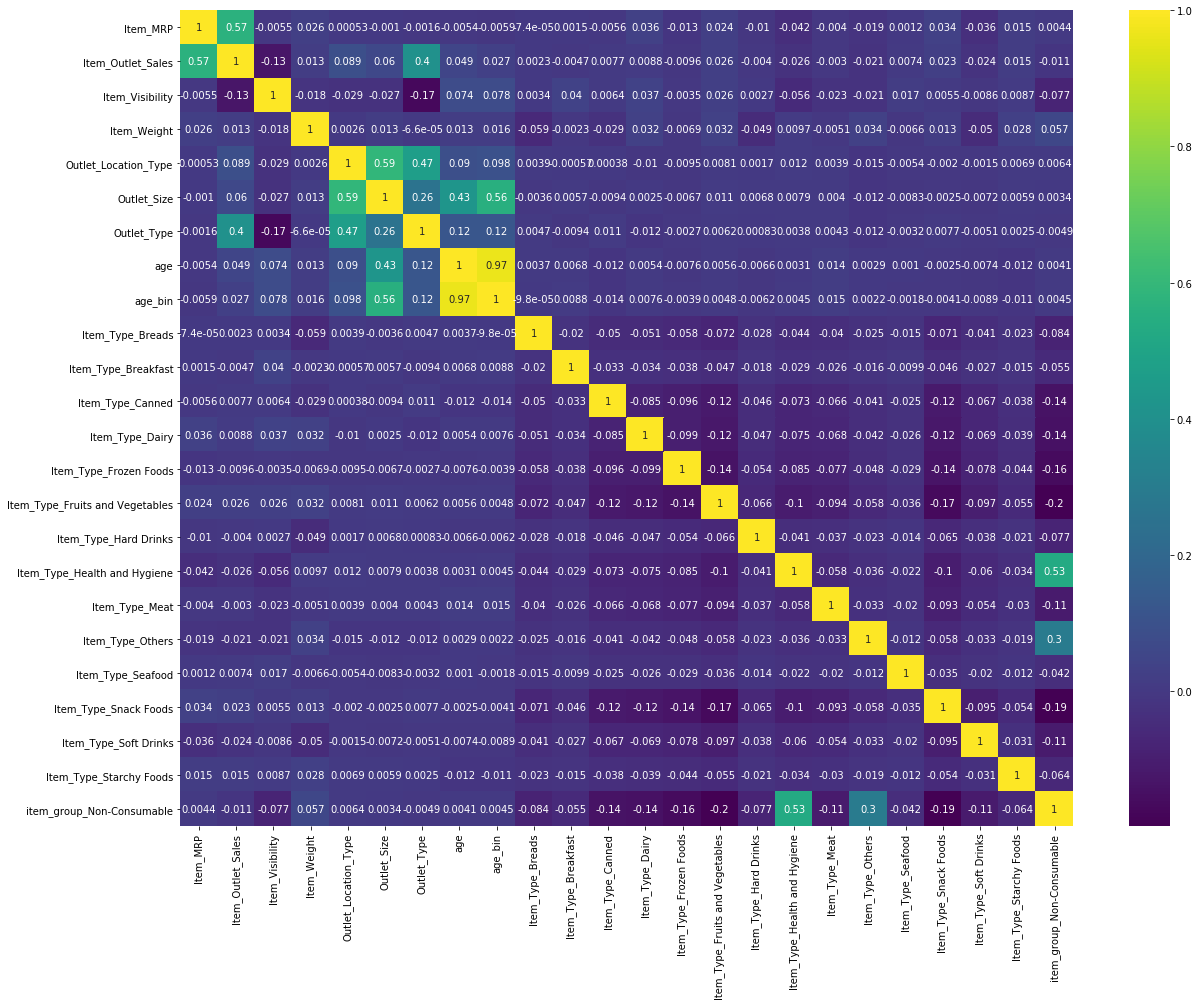

In [2020]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(df1_train.corr(),annot = True,cmap='viridis')
plt.show()

In [2021]:
# Putting feature variable to X
X = df1_train.drop('Item_Outlet_Sales',axis=1)
# Putting response variable to y
y = df1_train['Item_Outlet_Sales']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [2022]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (5964, 23)
X_test: (2557, 23)
y_train: (5964,)
y_test: (2557,)


### Modelling

#### Linear Regression

In [2023]:
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2024]:
# Instantiate
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)
# predicting the  test set results
y_pred = lm.predict(X_test)
print(y_pred)

[2762.70914219 1908.02251108 4461.28537045 ... 3409.53721982 2874.85427908
  822.93869754]


In [2025]:
from sklearn.metrics import r2_score

In [2026]:
r2_score(y_test, y_pred)

0.491632707542596

#### AdaBoost Regressor

In [2027]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2028]:
from sklearn.ensemble import AdaBoostRegressor

model_ada= AdaBoostRegressor(n_estimators = 100)
model_ada.fit(X_train, y_train)

# predicting the test set results
y_pred = model_ada.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("r2_score: ",r2_score(y_test, y_pred))

RMSE : 1432.55680296165
r2_score:  0.26324491824635476


#### XGBoost Regressor

In [2029]:
from sklearn.ensemble import GradientBoostingRegressor

In [2030]:
model_xg = GradientBoostingRegressor()
model_xg.fit(X_train, y_train)

# predicting the test set results
y_pred = model_xg.predict(X_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print("r2_score: ",r2_score(y_test, y_pred))

[2629.78868171 1425.38112397 5126.23846726 ... 3202.85399853 2955.56712296
 1323.4604135 ]
RMSE : 1085.5299387811126
r2_score:  0.5769584265472407


#### Random Forest Regression

In [2031]:
from sklearn.ensemble import RandomForestRegressor

model_reg = RandomForestRegressor(n_estimators = 100)
model_reg.fit(X_train, y_train)

# predicting the  test set results
y_pred = model_reg.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print("r2_score: ",r2_score(y_test, y_pred))

[2057.708164 1530.720806 5423.2739   ... 3090.923236 2743.488822
 1173.798742]
RMSE : 1131.0879124975534
r2_score:  0.5407045323103538


#### Decision Tree Regressor

In [2032]:
from sklearn.tree import DecisionTreeRegressor

model_ds = DecisionTreeRegressor()
model_ds.fit(X_train, y_train)

# predicting the test set results
y_pred = model_ds.predict(X_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print("r2_score: ",r2_score(y_test, y_pred))

[2727.7826 1565.9616 4474.176  ... 1576.6144 2077.296  1278.336 ]
 RMSE :  1503.3130617634993
r2_score:  0.188668572300854


From the above models, XGBoost is giving the highest score. Let us predict the final dataset witht the same model

In [2033]:
k = df1_test[['Item_Identifier','Outlet_Identifier']]
df1_test.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1,inplace = True)


In [2034]:
df1_test.head()

,Item_Fat_Content,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,item_group,age,age_bin
8523,Low Fat,107.8622,Snack Foods,0.007565,20.750,Tier 1,Medium,Supermarket Type1,Food,21,20-30
8524,Regular,87.3198,Dairy,0.038428,8.300,Tier 2,Small,Supermarket Type1,Food,13,0-20
8525,Non-Consumable,241.7538,Others,0.099575,14.600,Tier 3,Medium,Grocery Store,Non-Consumable,22,20-30
8526,Low Fat,155.0340,Snack Foods,0.015388,7.315,Tier 2,Small,Supermarket Type1,Food,13,0-20
8527,Regular,234.2300,Dairy,0.118599,13.600,Tier 3,Medium,Supermarket Type3,Food,35,30-40


impute nominal data

In [2035]:
df1_test = pd.get_dummies(df1_test,columns=["Item_Type","item_group"],drop_first=True)

impute ordinal data

In [2036]:
df1_test['Item_Fat_Content'] = df1_test['Item_Fat_Content'].map({'Low Fat':0,'Regular':1,'Non-Consumable':2})
df1_test['Outlet_Location_Type'] = df1_test['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
df1_test['age_bin'] = df1_test['age_bin'].map({'0-20':0,'20-30':1,'30-40':2})
df1_test['Outlet_Type'] = df1_test['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
df1_test['Outlet_Size'] = df1_test['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [2037]:
i_columns = ['Item_MRP','Item_Visibility','Item_Weight','age']

In [2038]:
scaler = StandardScaler()
df1_test[i_columns] = scaler.fit_transform(df1_test[i_columns])
df1_test.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,age,age_bin,Item_Type_Breads,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,item_group_Food,item_group_Non-Consumable
8523,0,-0.536555,-1.247634,1.734064,0,1,1,-0.139891,1,0,...,0,0,0,0,0,1,0,0,1,0
8524,1,-0.868937,-0.624550,-0.938845,1,0,1,-1.095512,0,0,...,0,0,0,0,0,0,0,0,1,0
8525,2,1.629848,0.609940,0.413711,2,1,0,-0.020438,1,0,...,0,0,0,1,0,0,0,0,0,1
8526,0,0.226697,-1.089686,-1.150316,1,0,1,-1.095512,0,0,...,0,0,0,0,0,1,0,0,1,0
8527,1,1.508110,0.994020,0.199020,2,1,3,1.532446,2,0,...,0,0,0,0,0,0,0,0,1,0


In [2039]:
df1_test.drop(['Item_Fat_Content','Item_Type_Household','item_group_Food'],axis=1,inplace = True)

In [2040]:
df1_test.shape

(5681, 23)

In [2041]:
predictions = model_reg.predict(df1_test)

In [2042]:
final_prediction = pd.DataFrame({'Item_Identifier':k['Item_Identifier'],'Outlet_Identifier':k['Outlet_Identifier'],'Item_Outlet_Sales':predictions})

In [2045]:
final_prediction.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1722.824080
8524,FDW14,OUT017,1478.874960
8525,NCN55,OUT010,916.580228
8526,FDQ58,OUT017,2173.823684
8527,FDY38,OUT027,6797.118910


In [2047]:
final_prediction.to_csv('aa.csv')